### Diffusion in Networks

* #### Diffusion - processes in which norms of behavior are transmitted through social or geographic networks. 

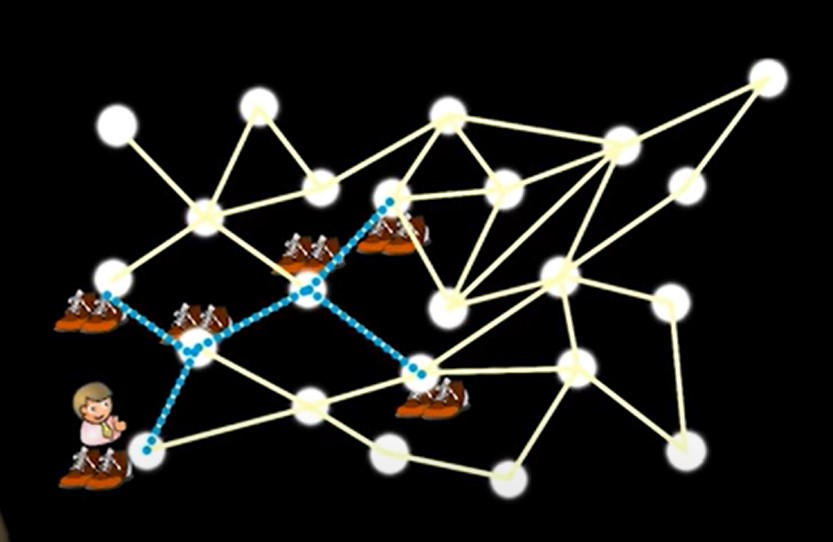

#### Payoff -
#### v and w are the players and A and B are the possible strategies. The payoffs are defined as follows:
* #### If v and w both adopt behavior A, they each get a payoff of a > 0; 
* #### if they both adopt B, they each get a payoff of b > 0; and 
* #### if they adopt opposite behaviors, they each get a payoff of 0.

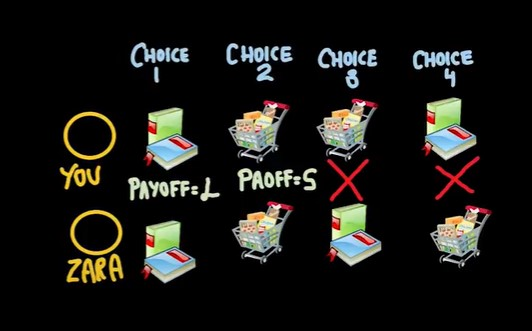

#### Consider a node in a larger network with d neighbours and p fraction of v's neighbours adopt A and the rest adopt B. The total payoff for v

#### payoffv = \begin{cases}a.p.d & \text{if v chooses A} \\ b.(1-p).d & \text{if v chooses B}\end{cases}
​
* #### Hence v chooses A if p >= b/(b+a)
* #### Payoff threshold : p >= b/(b+a)
#### p is v's fraction of neighbours with A. 

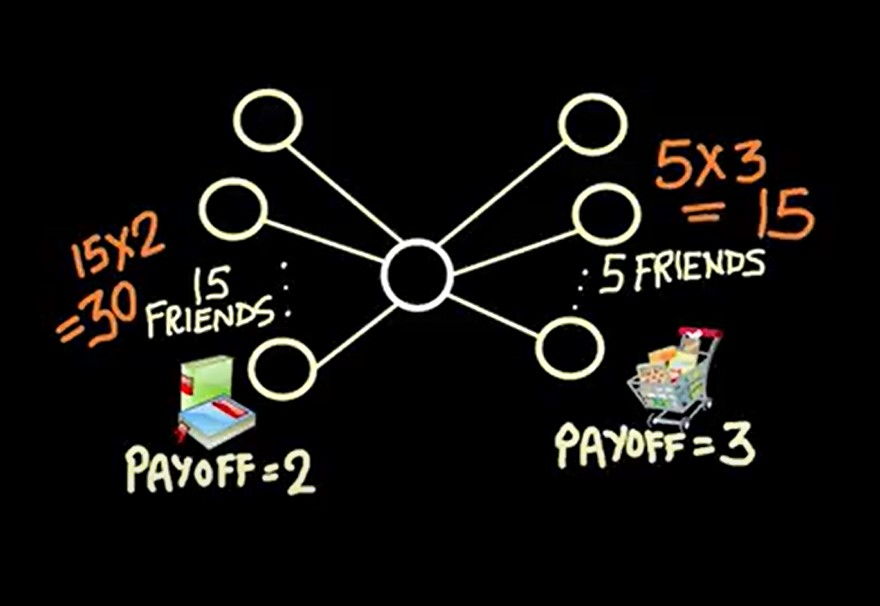

#### For any idea to get into the network :
* #### Increase the payoff (optional)
* #### Use the key people


* #### Higher the density, difficult is the injection of idea.
#### Density = Actual Edges / Total Possible Edges

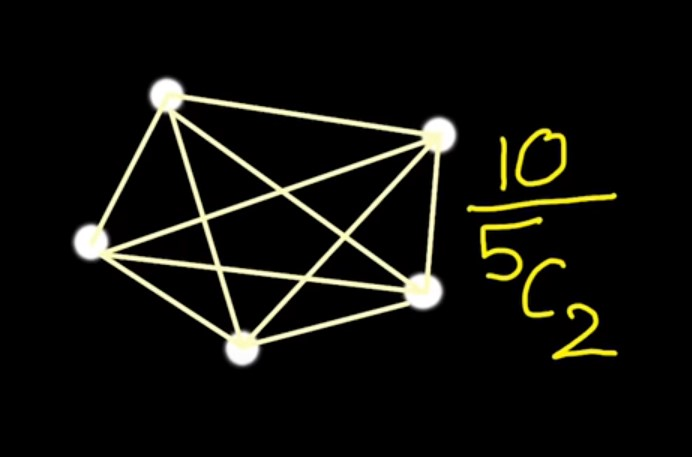

### Cascade and Clusters

* #### Cascade - periods during which individuals in a population exhibit herd-like behaviour because they are making decisions based on the actions of other individuals rather than relying on their own information about the problem.

* #### Cluster Density - Density of a cluster is D if D fraction of each of the node's neighbors are in this cluster.

#### If the threshold of adoption of new idea is Q , the cascade can't complete itself if there's exists a cluster in this network of density > 1-Q .

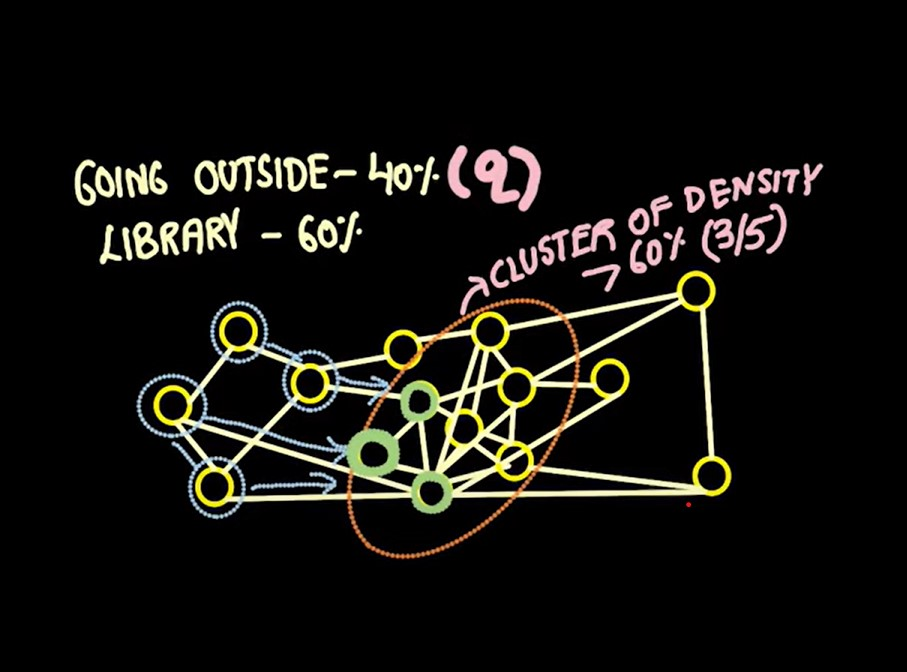

#### Here the idea of going outside can't enter within the cluster because each node in the cluster has cluster density > (1-40%) i.e each node has >= 60% of their neighbors within the cluster. Hence more payoff going to library.

#### Bi-implication statement
* #### Incomplete Cascade proves that there's a cluster of density > (1-Q) . 
* #### If there's a cluster of density > (1-Q) then the cascade is incomplete .

### Base Code

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

#### Creating and saving the graph

In [ ]:
G= nx.erdos_renyi_graph(10,0.5)
nx.write_gml(G, 'random_graph.gml')

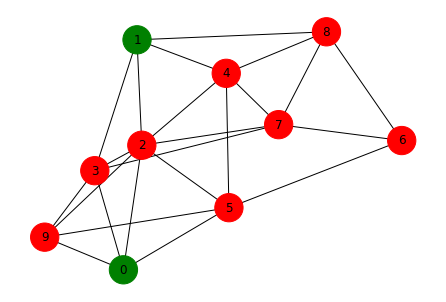

Cascade is incomplete


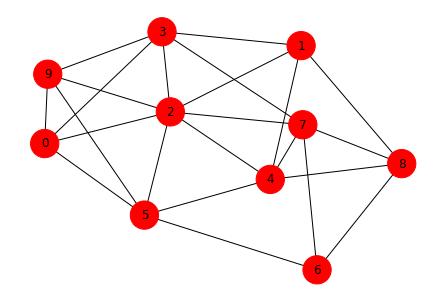

In [ ]:
# Nodes with idea B
def set_all_B(G):
  for each in G.nodes():
    G.nodes[each]['action']= 'B'


# Nodes with idea A
def set_A(G, list1):
  for each in list1:
    G.nodes[str(each)]['action']= 'A'


# Different colors for different ideas
def get_colors(G):
  list1=[]
  for each in G.nodes():
    if G.nodes[each]['action']=='B':
      list1.append('red')
    else:
      list1.append('green')
  return list1


# Finding number of neighbors of a given node
def find_neigh(each, c, G):
  num=0
  for each1 in G.neighbors(each):
    if G.nodes[each1]['action']==c:
      num= num+1
  return num


# Finding payoff values of both the ideas and recalculating
def recalculate_options(G):
  dict1= {}

  # Payoff(A)= a= 7
  # Payoff(B)= b= 5

  a=7
  b=5
  for each in G.nodes():
    num_A= find_neigh(each, 'A', G)
    num_B= find_neigh(each, 'B', G)

    payoff_A= a*num_A
    payoff_B= b*num_B

    if payoff_A>=payoff_B:
      dict1[each]= 'A'
    else:
      dict1[each]= 'B'
  return dict1


# Reseting node attributes based on node's ideas
def reset_node_attributes(G, action_dict):
  for each in action_dict:
    G.nodes[each]['action']= action_dict[each]


# If all nodes have same idea
def terminate_1(c, G):
  f=1
  for each in G.nodes():
    if G.nodes[each]['action']!=c:
      f=0
      break
  return f


# If all nodes have same idea or loop 100 times
def terminate(G, count):
  flag1= terminate_1('A', G)
  flag2= terminate_1('B', G)

  if flag1==1 or flag2==1 or count>=100:
    return 1
  else:
    return 0


G= nx.read_gml('random_graph.gml')
set_all_B(G)

list1= [0,1]
set_A(G, list1)

colors= get_colors(G)

nx.draw(G, node_color= colors, node_size= 800, with_labels=True)
plt.show()

flag=0
count=0
while(1):
  flag=terminate(G, count)
  if flag==1:
    break

  count= count+1
  action_dict= recalculate_options(G)
  reset_node_attributes(G, action_dict)
  colors= get_colors(G)

c= terminate_1('A', G)
if c==1:
  print("Cascade is complete")
else:
  print("Cascade is incomplete")

nx.draw(G, node_color= colors, node_size= 800, with_labels=True)
plt.show()

### Increasing the payoff value

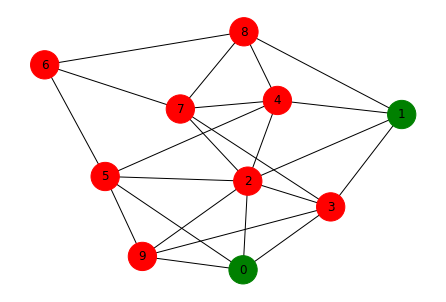

Cascade is complete


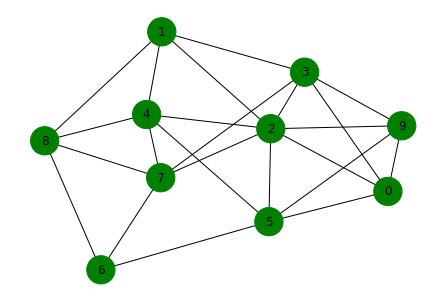

In [ ]:
# Nodes with idea B
def set_all_B(G):
  for each in G.nodes():
    G.nodes[each]['action']= 'B'


# Nodes with idea A
def set_A(G, list1):
  for each in list1:
    G.nodes[str(each)]['action']= 'A'


# Different colors for different ideas
def get_colors(G):
  list1=[]
  for each in G.nodes():
    if G.nodes[each]['action']=='B':
      list1.append('red')
    else:
      list1.append('green')
  return list1


# Finding number of neighbors of a given node
def find_neigh(each, c, G):
  num=0
  for each1 in G.neighbors(each):
    if G.nodes[each1]['action']==c:
      num= num+1
  return num


# Finding payoff values of both the ideas and recalculating
def recalculate_options(G):
  dict1= {}

  # Payoff(A)= a= 10
  # Payoff(B)= b= 4

  a=10
  b=4
  for each in G.nodes():
    num_A= find_neigh(each, 'A', G)
    num_B= find_neigh(each, 'B', G)

    payoff_A= a*num_A
    payoff_B= b*num_B

    if payoff_A>=payoff_B:
      dict1[each]= 'A'
    else:
      dict1[each]= 'B'
  return dict1


# Reseting node attributes based on node's ideas
def reset_node_attributes(G, action_dict):
  for each in action_dict:
    G.nodes[each]['action']= action_dict[each]


# If all nodes have same idea
def terminate_1(c, G):
  f=1
  for each in G.nodes():
    if G.nodes[each]['action']!=c:
      f=0
      break
  return f


# If all nodes have same idea or loop 100 times
def terminate(G, count):
  flag1= terminate_1('A', G)
  flag2= terminate_1('B', G)

  if flag1==1 or flag2==1 or count>=100:
    return 1
  else:
    return 0

G= nx.read_gml('random_graph.gml')
set_all_B(G)

list1= [0,1]
set_A(G, list1)

colors= get_colors(G)

nx.draw(G, node_color= colors, node_size= 800, with_labels=True)
plt.show()

flag=0
count=0
while(1):
  flag=terminate(G, count)
  if flag==1:
    break

  count= count+1
  action_dict= recalculate_options(G)
  reset_node_attributes(G, action_dict)
  colors= get_colors(G)

c= terminate_1('A', G)
if c==1:
  print("Cascade is complete")
else:
  print("Cascade is incomplete")

nx.draw(G, node_color= colors, node_size= 800, with_labels=True)
plt.show()

### Finding key people

In [ ]:
# Nodes with idea B
def set_all_B(G):
  for each in G.nodes():
    G.nodes[each]['action']= 'B'


# Nodes with idea A
def set_A(G, list1):
  for each in list1:
    G.nodes[str(each)]['action']= 'A'


# Different colors for different ideas
def get_colors(G):
  list1=[]
  for each in G.nodes():
    if G.nodes[each]['action']=='B':
      list1.append('red')
    else:
      list1.append('green')
  return list1


# Finding number of neighbors of a given node
def find_neigh(each, c, G):
  num=0
  for each1 in G.neighbors(each):
    if G.nodes[each1]['action']==c:
      num= num+1
  return num


# Finding payoff values of both the ideas and recalculating
def recalculate_options(G):
  dict1= {}

  # Payoff(A)= a= 9
  # Payoff(B)= b= 5

  a=9
  b=5
  for each in G.nodes():
    num_A= find_neigh(each, 'A', G)
    num_B= find_neigh(each, 'B', G)

    payoff_A= a*num_A
    payoff_B= b*num_B

    if payoff_A>=payoff_B:
      dict1[each]= 'A'
    else:
      dict1[each]= 'B'
  return dict1


# Reseting node attributes based on node's ideas
def reset_node_attributes(G, action_dict):
  for each in action_dict:
    G.nodes[each]['action']= action_dict[each]


# If all nodes have same idea
def terminate_1(c, G):
  f=1
  for each in G.nodes():
    if G.nodes[each]['action']!=c:
      f=0
      break
  return f


# If all nodes have same idea or loop 100 times
def terminate(G, count):
  flag1= terminate_1('A', G)
  flag2= terminate_1('B', G)

  if flag1==1 or flag2==1 or count>=100:
    return 1
  else:
    return 0


for u in G.nodes():
  for v in G.nodes():
    if u<v:
      print(u,v)

      list1= []
      list1.append(u)
      list1.append(v)

      set_all_B(G)
      set_A(G, list1)
      colors= get_colors(G)

      flag=0
      count=0
      while(1):
        flag=terminate(G, count)
        if flag==1:
          break

        count= count+1
        action_dict= recalculate_options(G)
        reset_node_attributes(G, action_dict)
        colors= get_colors(G)

      c= terminate_1('A', G)
      if c==1:
        print("Cascade is complete")
      else:
        print("Cascade is incomplete")

0 1
Cascade is incomplete
0 2
Cascade is complete
0 3
Cascade is incomplete
0 4
Cascade is incomplete
0 5
Cascade is incomplete
0 6
Cascade is incomplete
0 7
Cascade is incomplete
0 8
Cascade is incomplete
0 9
Cascade is incomplete
1 2
Cascade is incomplete
1 3
Cascade is incomplete
1 4
Cascade is incomplete
1 5
Cascade is incomplete
1 6
Cascade is incomplete
1 7
Cascade is incomplete
1 8
Cascade is incomplete
1 9
Cascade is incomplete
2 3
Cascade is complete
2 4
Cascade is complete
2 5
Cascade is complete
2 6
Cascade is incomplete
2 7
Cascade is incomplete
2 8
Cascade is complete
2 9
Cascade is complete
3 4
Cascade is incomplete
3 5
Cascade is incomplete
3 6
Cascade is incomplete
3 7
Cascade is incomplete
3 8
Cascade is incomplete
3 9
Cascade is incomplete
4 5
Cascade is incomplete
4 6
Cascade is incomplete
4 7
Cascade is incomplete
4 8
Cascade is incomplete
4 9
Cascade is incomplete
5 6
Cascade is incomplete
5 7
Cascade is incomplete
5 8
Cascade is incomplete
5 9
Cascade is incomplet

### Impact of communities on cascades

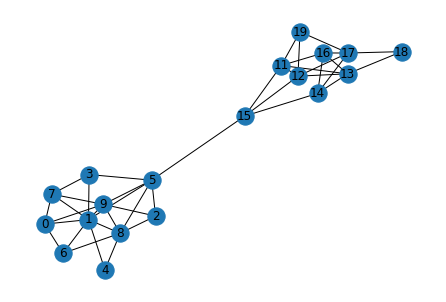

In [ ]:
# Create a community 1
def create_first_community(G):
  for i in range(0,10):
    G.add_node(i)

  for i in range(0,10):
    for j in range(0,10):
      if i<j:
        r= random.uniform(0,1)
        
        if r<0.5:
          G.add_edge(i,j)


# Create a community 2
def create_second_community(G):
  for i in range(11,20):
    G.add_node(i)

  for i in range(11,20):
    for j in range(11,20):
      if i<j:
        r= random.uniform(0,1)
        
        if r<0.5:
          G.add_edge(i,j)

# Create a graph having 2 communities and save it
G= nx.Graph()
create_first_community(G)
create_second_community(G)
G.add_edge(5,15)

nx.draw(G, with_labels=True)
plt.show()

nx.write_gml(G, 'random_graph_community.gml')

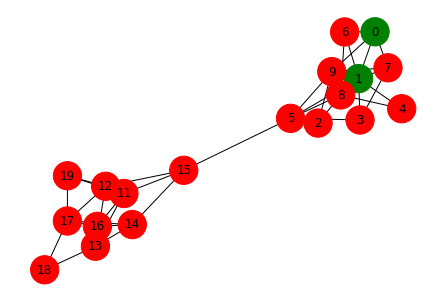

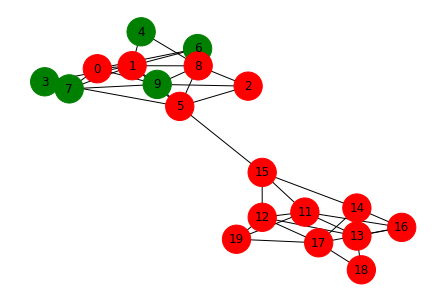

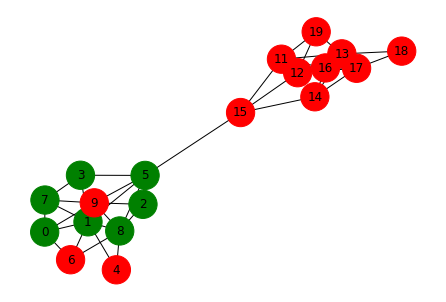

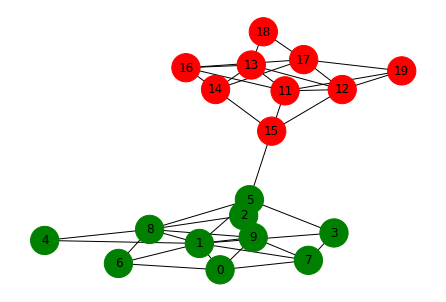

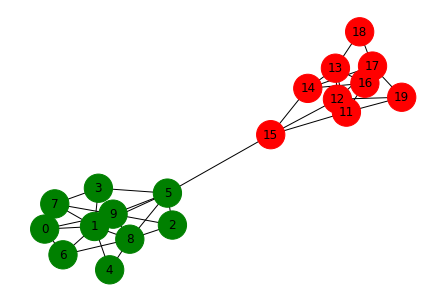

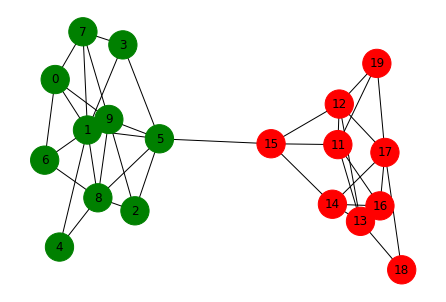

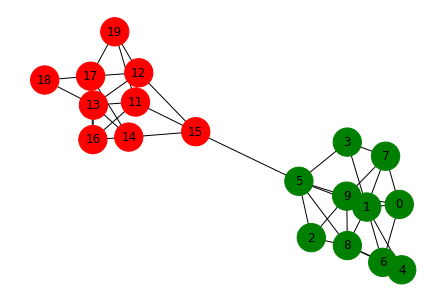

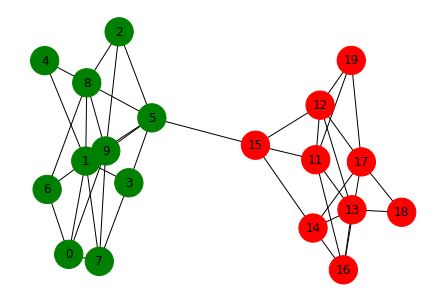

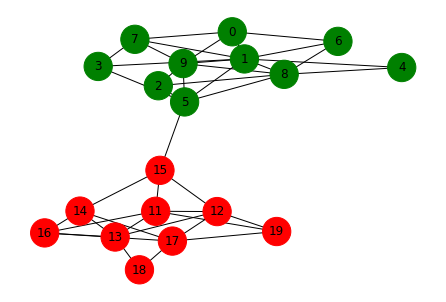

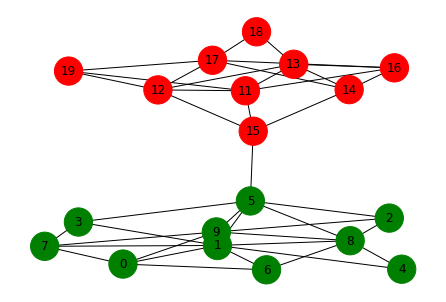

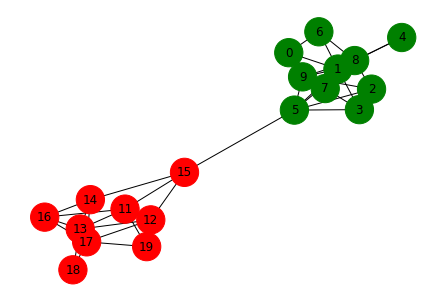

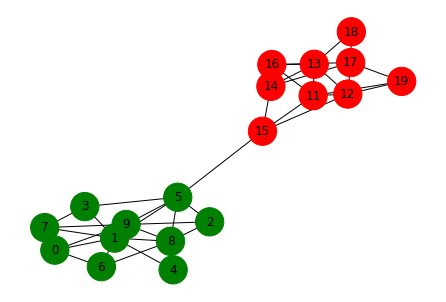

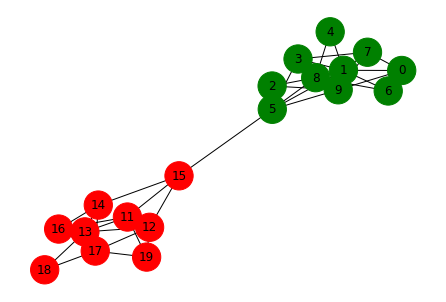

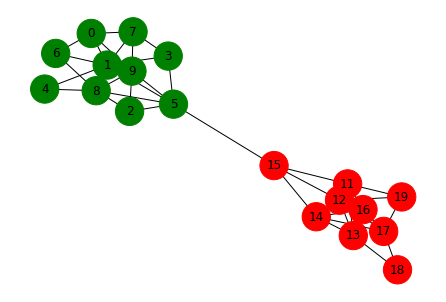

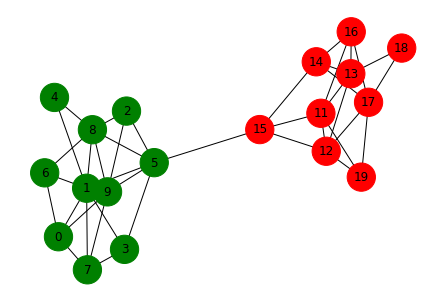

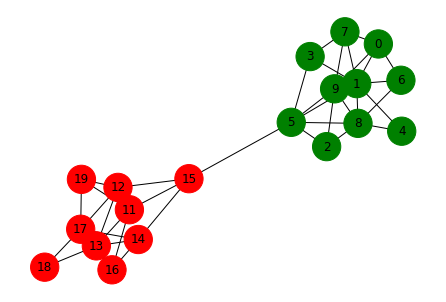

Cascade is incomplete


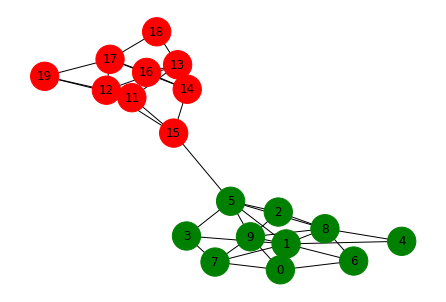

In [ ]:
# Nodes with idea B
def set_all_B(G):
  for each in G.nodes():
    G.nodes[each]['action']= 'B'


# Nodes with idea A
def set_A(G, list1):
  for each in list1:
    G.nodes[str(each)]['action']= 'A'


# Different colors for different ideas
def get_colors(G):
  list1=[]
  for each in G.nodes():
    if G.nodes[each]['action']=='B':
      list1.append('red')
    else:
      list1.append('green')
  return list1


# Finding number of neighbors of a given node
def find_neigh(each, c, G):
  num=0
  for each1 in G.neighbors(each):
    if G.nodes[each1]['action']==c:
      num= num+1
  return num


# Finding payoff values of both the ideas and recalculating
def recalculate_options(G):
  dict1= {}

  # Payoff(A)= a= 10
  # Payoff(B)= b= 5

  a=10
  b=5
  for each in G.nodes():
    num_A= find_neigh(each, 'A', G)
    num_B= find_neigh(each, 'B', G)

    payoff_A= a*num_A
    payoff_B= b*num_B

    if payoff_A>=payoff_B:
      dict1[each]= 'A'
    else:
      dict1[each]= 'B'
  return dict1


# Reseting node attributes based on node's ideas
def reset_node_attributes(G, action_dict):
  for each in action_dict:
    G.nodes[each]['action']= action_dict[each]


# If all nodes have same idea
def terminate_1(c, G):
  f=1
  for each in G.nodes():
    if G.nodes[each]['action']!=c:
      f=0
      break
  return f

# If all nodes have same idea or loop 15 times
def terminate(G, count):
  flag1= terminate_1('A', G)
  flag2= terminate_1('B', G)

  if flag1==1 or flag2==1 or count>=15:
    return 1
  else:
    return 0


G= nx.read_gml('random_graph_community.gml')
set_all_B(G)

list1= [0,1]
set_A(G, list1)
colors= get_colors(G)

nx.draw(G, node_color= colors, node_size= 800, with_labels=True)
plt.show()

flag=0
count=0
while(1):
  flag= terminate(G, count)
  if flag==1:
    break

  count= count+1
  action_dict= recalculate_options(G)
  reset_node_attributes(G, action_dict)
  colors= get_colors(G)

  nx.draw(G, node_color= colors, node_size= 800, with_labels=True)
  plt.show()

c= terminate_1('A', G)
if c==1:
  print("Cascade is complete")
else:
  print("Cascade is incomplete")

nx.draw(G, node_color= colors, node_size= 800, with_labels=True)

plt.show()

### Cascades and Clusters

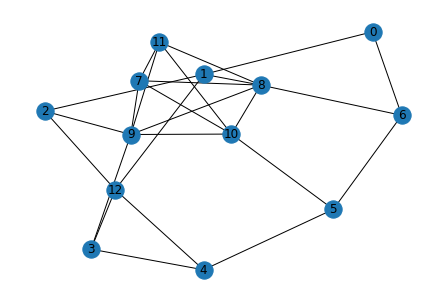

[0, 1, 2, 3]


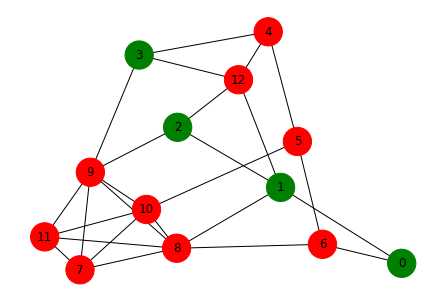

Cascade is incomplete


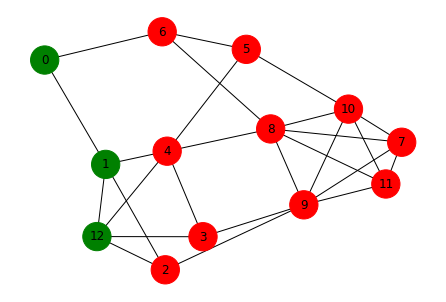

[0, 2, 3, 4]


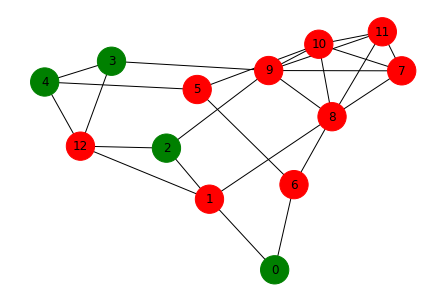

Cascade is incomplete


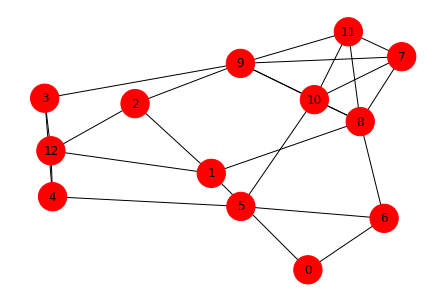

[1, 2, 3, 4]


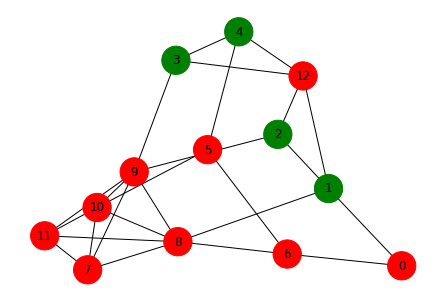

Cascade is incomplete


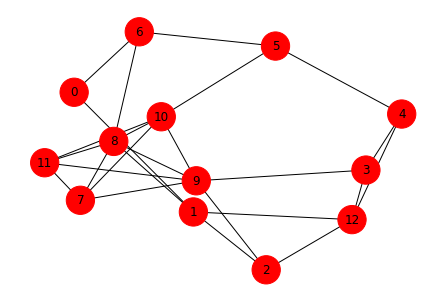

[2, 3, 4, 5]


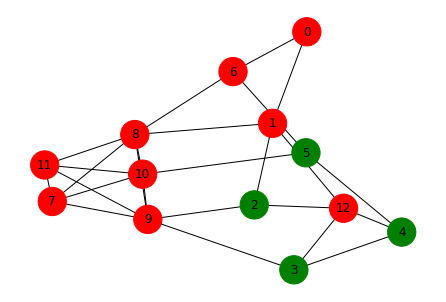

Cascade is incomplete


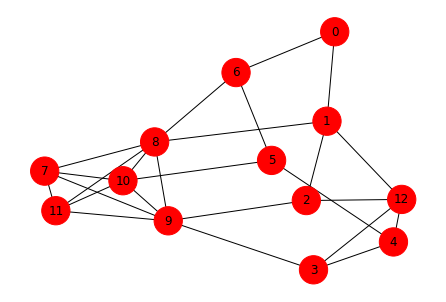

[3, 4, 5, 6]


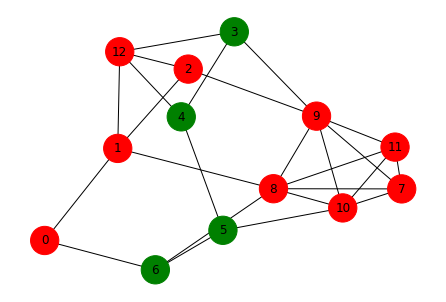

Cascade is incomplete


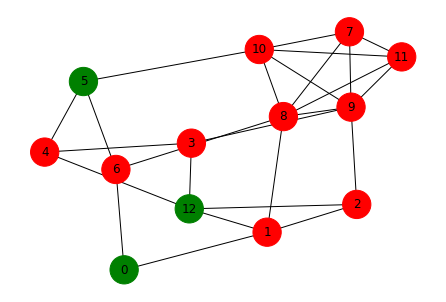

[4, 5, 6, 12]


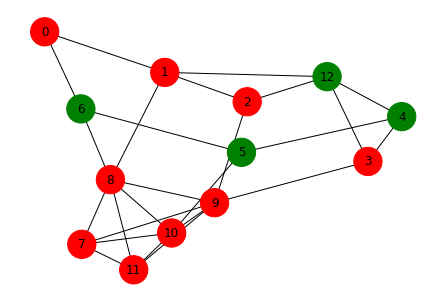

Cascade is incomplete


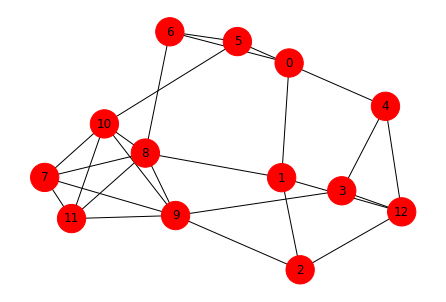

[2, 3, 4, 12]


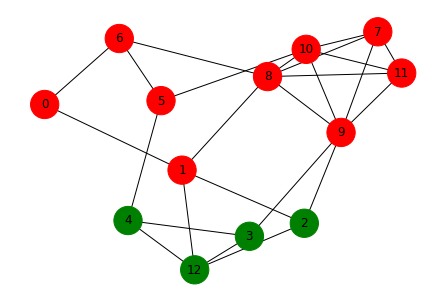

Cascade is incomplete


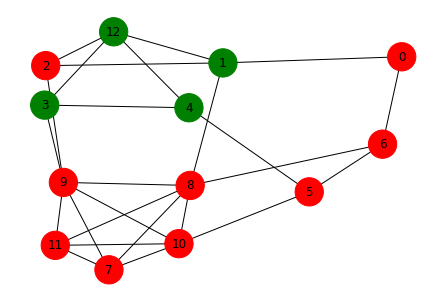

[0, 1, 2, 3, 4, 5]


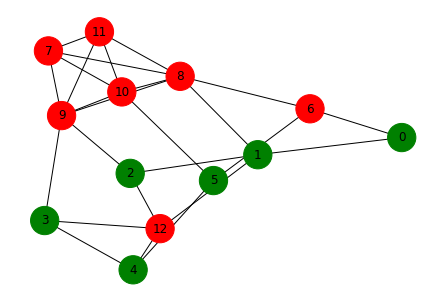

Cascade is incomplete


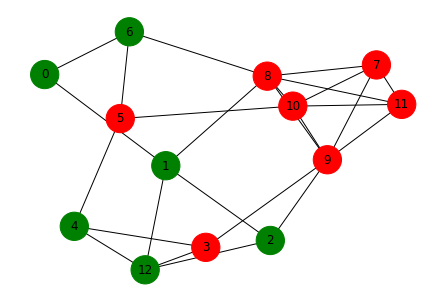

[0, 1, 2, 3, 4, 5, 6, 12]


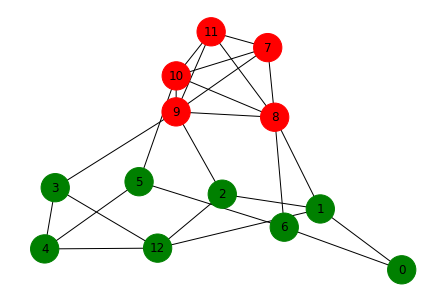

Cascade is incomplete


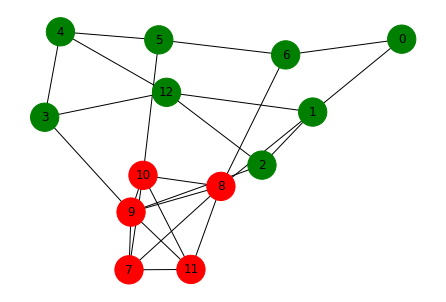

In [ ]:
# Create a graph and add edges
G= nx.Graph()
G.add_edges_from([(0,1),(0,6),(1,2),(1,8),(1,12),(2,9),(2,12),(3,4),(3,9),(3,12),(4,5),(4,12),(5,6),(5,10),(6,8),(7,8),(7,9),(7,10),(7,11),(8,9),(8,10),(8,11),(9,10),(9,11),(10,11)])

nx.draw(G,with_labels=True)
plt.show()


# Nodes with idea B
def set_all_B(G):
  for each in G.nodes():
    G.nodes[each]['action']= 'B'


# Nodes with idea A
def set_A(G, list1):
  for each in list1:
    G.nodes[each]['action']= 'A'


# Different colors for different ideas
def get_colors(G):
  list1=[]
  for each in G.nodes():
    if G.nodes[each]['action']=='B':
      list1.append('red')
    else:
      list1.append('green')
  return list1


# Finding number of neighbors of a given node
def find_neigh(each, c, G):
  num=0
  for each1 in G.neighbors(each):
    if G.nodes[each1]['action']==c:
      num= num+1
  return num


# Finding payoff values of both the ideas and recalculating
def recalculate_options(G):
  dict1= {}

  # Payoff(A)= a= 3
  # Payoff(B)= b= 2

  a=3
  b=2
  for each in G.nodes():
    num_A= find_neigh(each, 'A', G)
    num_B= find_neigh(each, 'B', G)

    payoff_A= a*num_A
    payoff_B= b*num_B

    if payoff_A>=payoff_B:
      dict1[each]= 'A'
    else:
      dict1[each]= 'B'
  return dict1


# Reseting node attributes based on node's ideas
def reset_node_attributes(G, action_dict):
  for each in action_dict:
    G.nodes[each]['action']= action_dict[each]


# If all nodes have same idea
def terminate_1(c, G):
  f=1
  for each in G.nodes():
    if G.nodes[each]['action']!=c:
      f=0
      break
  return f

# If all nodes have same idea or loop 15 times
def terminate(G, count):
  flag1= terminate_1('A', G)
  flag2= terminate_1('B', G)

  if flag1==1 or flag2==1 or count>=15:
    return 1
  else:
    return 0

# Finding different set of nodes to see if the cascade completes the cluster
list2= [[0,1,2,3],[0,2,3,4],[1,2,3,4],[2,3,4,5],[3,4,5,6],[4,5,6,12],[2,3,4,12],[0,1,2,3,4,5],[0,1,2,3,4,5,6,12]]

for list1 in list2:
  print(list1)

  set_all_B(G)
  set_A(G, list1)
  colors= get_colors(G)

  nx.draw(G, node_color= colors, node_size= 800, with_labels=True)
  plt.show()

  flag=0
  count=0
  while(1):
    flag=terminate(G, count)
    if flag==1:
      break

    count= count+1
    action_dict= recalculate_options(G)
    reset_node_attributes(G, action_dict)
    colors= get_colors(G)

  c= terminate_1('A', G)
  if c==1:
    print("Cascade is complete")
  else:
    print("Cascade is incomplete")

  nx.draw(G, node_color= colors, node_size= 800, with_labels=True)
  plt.show()